# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Поперебирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

features = np.arange(X_train.shape[1])


def model_score(model, selected_features):
    selected_features = np.array(sorted(selected_features))
    s_X_train = X_train[:, selected_features]
    s_X_test = X_test[:, selected_features]
    model.fit(s_X_train, y_train)
    y_pred = model.predict(s_X_test)
    return accuracy_score(y_test, y_pred)

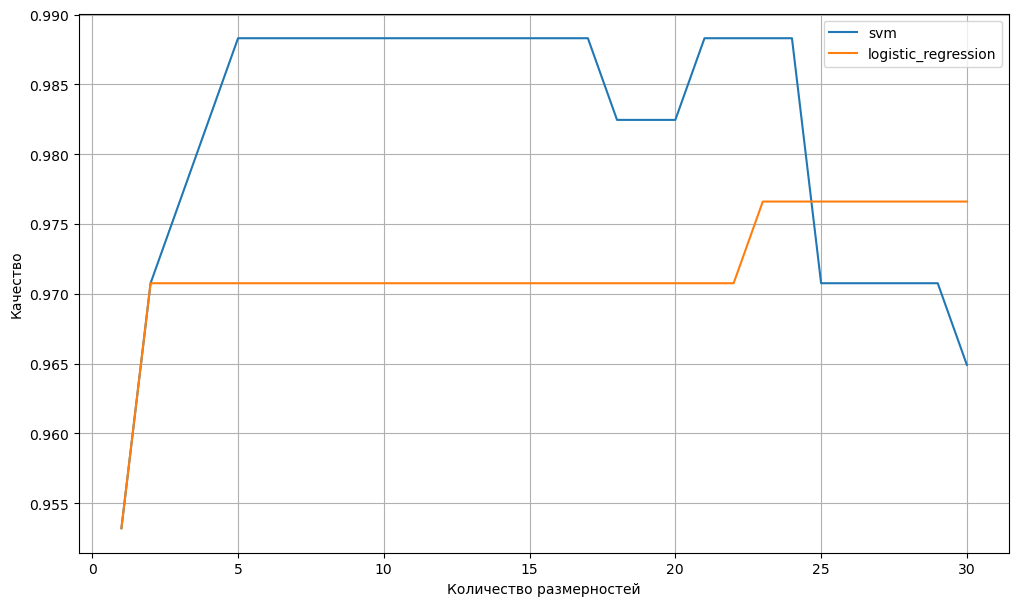

In [3]:
def choose_the_best(model, selected_features):
    best_feature = -1
    best_score = -1

    for feature in features:
        if feature not in selected_features:
            temp_features = selected_features + [feature]
            score = model_score(model, temp_features)

            if best_score < score:
                best_feature = feature
                best_score = score
    
    return best_feature


model_svm = LinearSVC(random_state=42)
model_lg = LogisticRegression(max_iter=10000, random_state=42)

selected_feature_svm = []
selected_feature_lg = []

accuracy_svm = []
accuracy_lg = []

for i in range(len(features)):
    b_f = choose_the_best(model_svm, selected_feature_svm)
    selected_feature_svm.append(b_f)
    accuracy_svm.append(model_score(model_svm, selected_feature_svm))

    b_f = choose_the_best(model_lg, selected_feature_lg)
    selected_feature_lg.append(b_f)
    accuracy_lg.append(model_score(model_lg, selected_feature_lg))

plt.figure(figsize=(12, 7))
plt.plot(features + 1, accuracy_svm, label="svm")
plt.plot(features + 1, accuracy_lg, label="logistic_regression")
plt.xlabel("Количество размерностей")
plt.ylabel("Качество")
plt.grid()
plt.legend()
plt.show()


# Backward elimination (2pts)

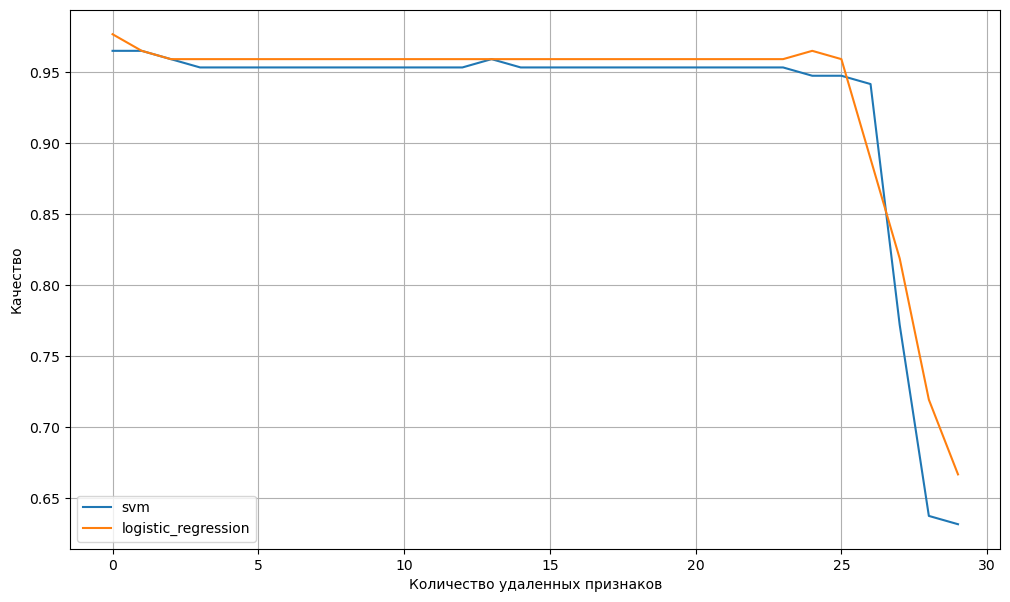

In [4]:

def choose_the_worst(model, remoted_features, selected_features):
    worst_feature = -1
    worst_score = 1.1

    for feature in features:
        if feature not in remoted_features:
            temp_features = selected_features.copy()
            temp_features.remove(feature)
            score = model_score(model, temp_features)

            if worst_score > score:
                worst_feature = feature
                worst_score = score
    
    return worst_feature

model_svm = LinearSVC(random_state=42)
model_lg = LogisticRegression(max_iter=10000, random_state=42)

remoted_feature_svm = []
remoted_feature_lg = []

selected_feature_svm = [i for i in range(0, 30)]
selected_feature_lg = [i for i in range(0, 30)]

accuracy_svm = [model_score(model_svm, features)]
accuracy_lg = [model_score(model_lg, features)]


for i in range(len(features) - 1):
    w_f = choose_the_worst(model_svm, remoted_feature_svm, selected_feature_svm)
    remoted_feature_svm.append(w_f)
    selected_feature_svm.remove(w_f)
    accuracy_svm.append(model_score(model_svm, selected_feature_svm))

    w_f = choose_the_worst(model_lg, remoted_feature_lg, selected_feature_lg)
    remoted_feature_lg.append(w_f)
    selected_feature_lg.remove(w_f)
    accuracy_lg.append(model_score(model_lg, selected_feature_lg))


plt.figure(figsize=(12, 7))
plt.plot(features, accuracy_svm, label="svm")
plt.plot(features, accuracy_lg, label="logistic_regression")
plt.xlabel("Количество удаленных признаков")
plt.ylabel("Качество")
plt.grid()
plt.legend()
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

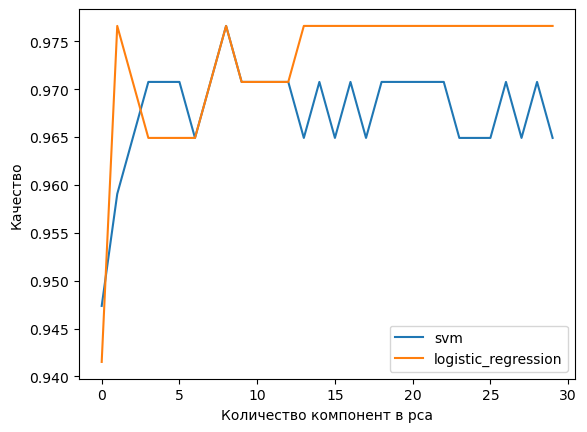

In [5]:
from sklearn.decomposition import PCA


def score_model (model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

plt.cla()

accuracy_svm = []
accuracy_lg = []

model_svm = LinearSVC(random_state=42)
model_reg = LogisticRegression(max_iter=10000, random_state=42)

for n_components in range(1, len(features) + 1):
    pca = decomposition.PCA(n_components=n_components) 
    
    X_ = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=42)

    accuracy_svm.append(score_model(model_svm, X_train, X_test, y_train, y_test))
    accuracy_lg.append(score_model(model_reg, X_train, X_test, y_train, y_test))

plt.plot(features, accuracy_svm, label="svm")
plt.plot(features, accuracy_lg, label="logistic_regression")
plt.xlabel("Количество компонент в pca")
plt.ylabel("Качество")
plt.legend()
plt.show()

#  Выводы (1pts)

### Forward selection
Наилучший резьтат был при 20-25 признаках. При добавлении нового признака точность логической регрессии постепенно увеличивается, а точность svm сперва возрастает, но после начинает снижаться. В среднем точность svm выше, чем точность логистической регрессии

### Backward elimination

Точность логистической регрессии практически не изменяется при 5-30 признаках, однако резко начинает падать после 25го удаленного элменета. График svm очень схож сграфиком логистической регрессии. В среднем точность svm незначительнро ниже, чем точность логистической регрессии

### PCA

При использовании PCA точность логистической регрессии примерно возрастает при увеличении количества признаков. Точность svm неоднородна, постоянно повышается и понижается. Точность ниже, чем у логистической регрессии.